In [32]:
import pandas as pd

In [33]:
df = pd.read_csv("first_exo/concrete_strength_dataset.csv")

In [34]:
# pip install keras

In [35]:
# pip install tensorflow

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [37]:
# split into input (X) and output (y) variables
X = df.drop(['Strength'],axis=1)
y = df["Strength"]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
import pickle

# pickle.dump(X_train, open("data/X_test.sav", 'wb')
pickle.dump(y_test, open("data/y_test.sav", 'wb'))

In [40]:
# N'est pas très utile pour notre problématique

# from sklearn.preprocessing import StandardScaler

# # define standard scaler
# scaler = StandardScaler()
# # transform data
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_train)

In [41]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

In [42]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [43]:
...
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
...

Ellipsis

In [44]:
print(df[0:6:])

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
5             932.0           670.0   90     47.03  


In [45]:
from keras.callbacks import EarlyStopping

stp = EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=1,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
)

In [46]:
...
# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_split=0.15,epochs=500, batch_size=32,shuffle=True)
...
# ,validation_split=0.33,callbacks=EarlyStopping(monitor='val_loss')

Epoch 1/500
19/19 [==============================] - 1s 21ms/step - loss: 13097.9863 - mse: 13097.9863 - val_loss: 6153.8516 - val_mse: 6153.8516
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 3344.7275 - mse: 3344.7275 - val_loss: 788.9818 - val_mse: 788.9818
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 837.6824 - mse: 837.6824 - val_loss: 679.6658 - val_mse: 679.6658
Epoch 4/500
19/19 [==============================] - 0s 3ms/step - loss: 653.5344 - mse: 653.5344 - val_loss: 444.0610 - val_mse: 444.0610
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 533.3087 - mse: 533.3087 - val_loss: 403.8588 - val_mse: 403.8588
Epoch 6/500
19/19 [==============================] - 0s 3ms/step - loss: 462.6135 - mse: 462.6135 - val_loss: 352.2562 - val_mse: 352.2562
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 405.5789 - mse: 405.5789 - val_loss: 314.5722 - val_mse: 314.5722
Epoch 8/500
19/19 

Ellipsis

In [47]:
import matplotlib.pyplot as plt

print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


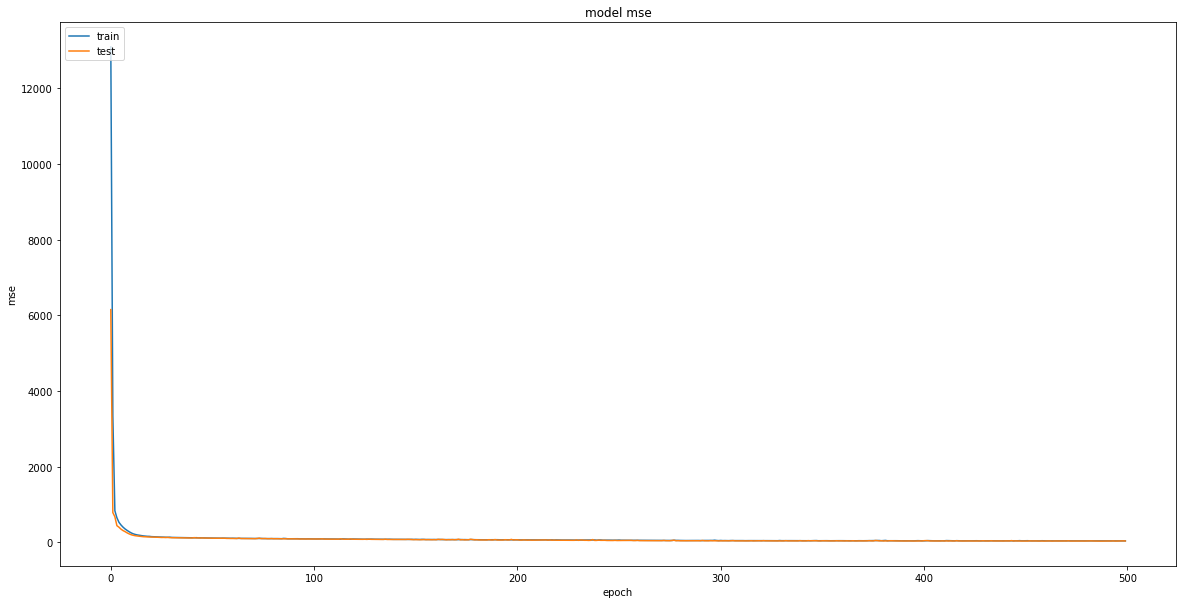

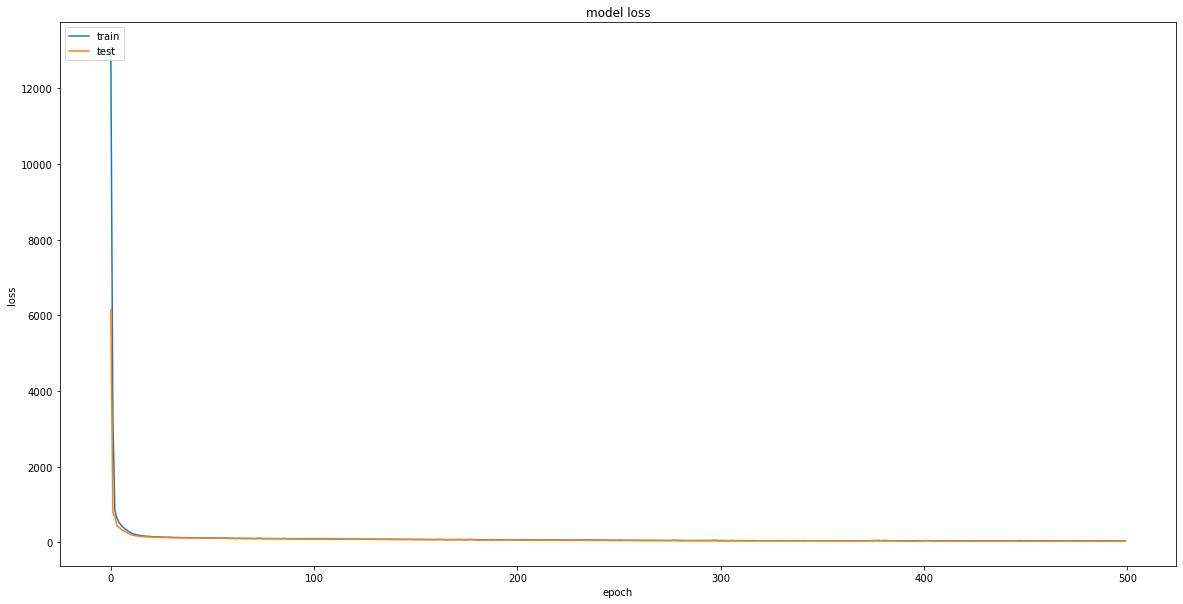

In [48]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [49]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.8092835261242214


In [50]:
print(model.predict(X_test))

[[44.364788 ]
 [47.130672 ]
 [69.54855  ]
 [44.12872  ]
 [18.04114  ]
 [42.3961   ]
 [31.38112  ]
 [51.600517 ]
 [34.799442 ]
 [47.822514 ]
 [35.394485 ]
 [15.456403 ]
 [49.23711  ]
 [46.949924 ]
 [23.317919 ]
 [30.521122 ]
 [36.83962  ]
 [20.490934 ]
 [37.66959  ]
 [28.08992  ]
 [39.51943  ]
 [38.094303 ]
 [48.760365 ]
 [15.298097 ]
 [30.483723 ]
 [38.50586  ]
 [12.783589 ]
 [43.704723 ]
 [49.23082  ]
 [16.86264  ]
 [43.091633 ]
 [44.14369  ]
 [56.19221  ]
 [54.586864 ]
 [20.917257 ]
 [36.58807  ]
 [34.433445 ]
 [42.086285 ]
 [12.995332 ]
 [55.949257 ]
 [18.65091  ]
 [ 7.1820836]
 [40.25633  ]
 [53.92697  ]
 [11.937911 ]
 [70.8472   ]
 [51.662674 ]
 [46.748775 ]
 [29.208818 ]
 [10.833547 ]
 [51.95847  ]
 [45.33019  ]
 [29.48231  ]
 [23.047617 ]
 [54.647392 ]
 [44.070118 ]
 [25.68528  ]
 [14.652322 ]
 [44.4411   ]
 [28.287994 ]
 [41.91955  ]
 [18.534145 ]
 [40.639294 ]
 [49.90642  ]
 [29.302496 ]
 [19.258522 ]
 [36.184307 ]
 [19.48045  ]
 [41.94082  ]
 [23.756159 ]
 [12.544848 ]
 [25.6

In [51]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.8092835261242214


In [52]:
model.save('data/model.h5')

In [53]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [54]:
def Model():
    # define the keras model
    modo = Sequential()
    modo.add(Dense(12, input_dim=8, activation='relu'))
    modo.add(Dense(8, activation='relu'))
    modo.add(Dense(6, activation='relu'))
    modo.add(Dense(1, activation='linear'))
    # compile the keras model
    # model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return modo

In [55]:
# pip install scikeras --user
clf = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=600,optimizer='adam', metrics=['mse'], shuffle=True,
                           validation_split=0.2)

In [56]:
pipe = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf)
])


pipe.fit(X_train, y_train)

Epoch 1/600
18/18 [==============================] - 1s 14ms/step - loss: 1568.7272 - mean_squared_error: 1568.7272 - val_loss: 1568.2704 - val_mean_squared_error: 1568.2704
Epoch 2/600
18/18 [==============================] - 0s 4ms/step - loss: 1551.8816 - mean_squared_error: 1551.8816 - val_loss: 1547.6182 - val_mean_squared_error: 1547.6182
Epoch 3/600
18/18 [==============================] - 0s 4ms/step - loss: 1528.6946 - mean_squared_error: 1528.6946 - val_loss: 1520.3387 - val_mean_squared_error: 1520.3387
Epoch 4/600
18/18 [==============================] - 0s 5ms/step - loss: 1497.2440 - mean_squared_error: 1497.2440 - val_loss: 1485.0862 - val_mean_squared_error: 1485.0862
Epoch 5/600
18/18 [==============================] - 0s 4ms/step - loss: 1457.9213 - mean_squared_error: 1457.9213 - val_loss: 1439.2986 - val_mean_squared_error: 1439.2986
Epoch 6/600
18/18 [==============================] - 0s 4ms/step - loss: 1405.4720 - mean_squared_error: 1405.4720 - val_loss: 1379.37

Pipeline(steps=[('rescale', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, epochs=600, loss='mean_squared_error', metrics=['mse'], model=<function Model at 0x0000015991A70EE0>, optimizer='adam', validation_split=0.2))])

In [57]:
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

22/22 [==============================] - 0s 1ms/step
Training set score: 0.9008042028732418
11/11 [==============================] - 0s 2ms/step
Test set score: 0.8550958720315278


In [58]:
hist = clf.history_.keys()
print(hist)

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


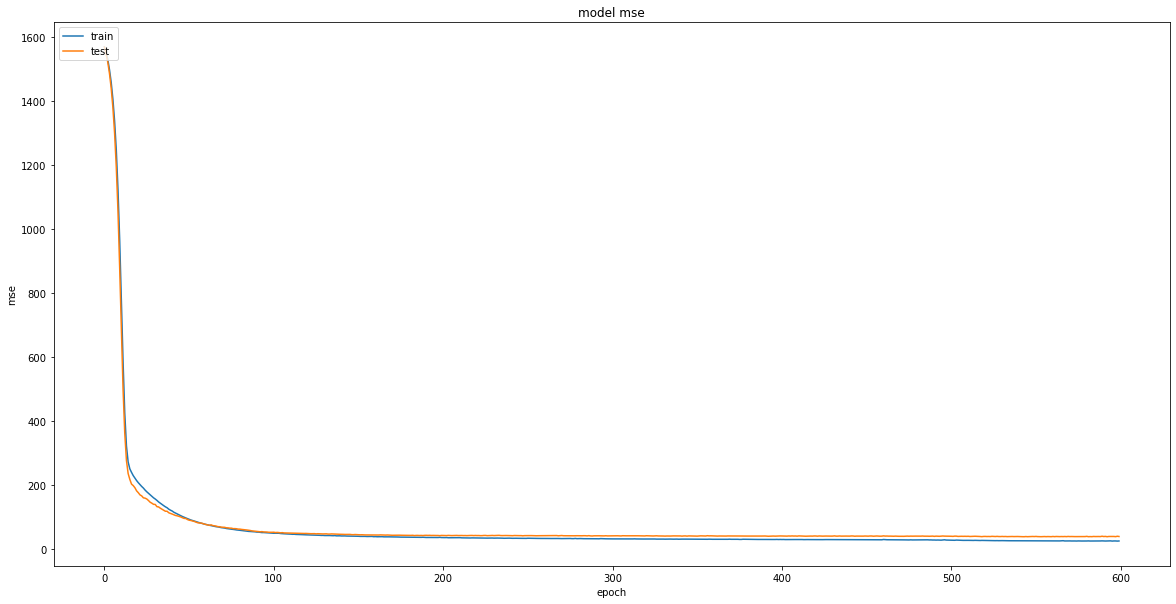

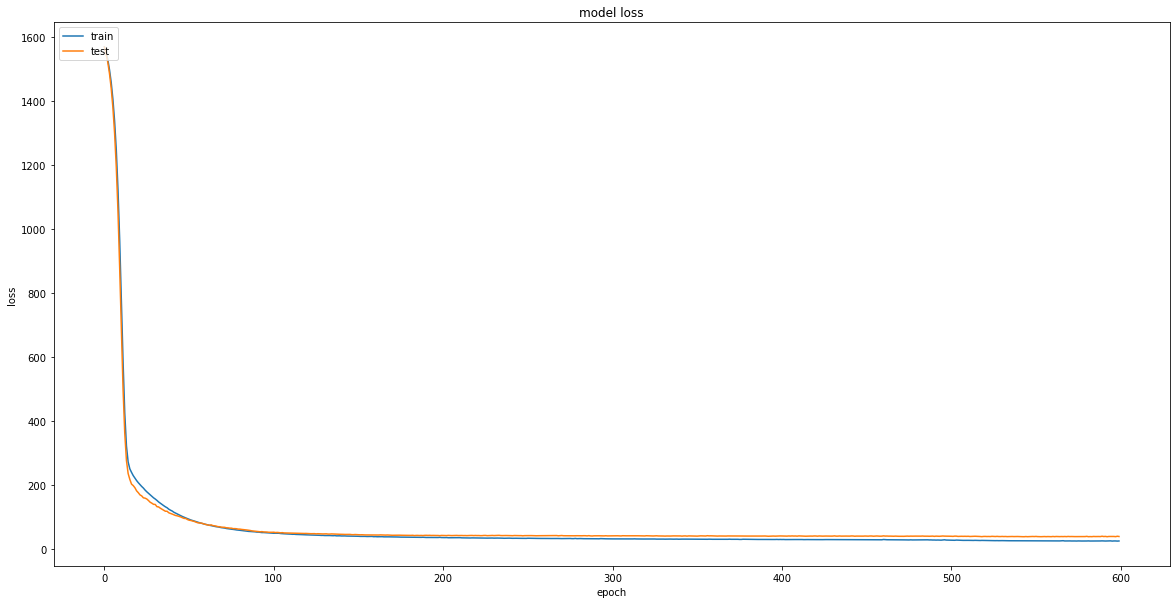

In [59]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(clf.history_['mean_squared_error'])
plt.plot(clf.history_['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(clf.history_['loss'])
plt.plot(clf.history_['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
print()

In [61]:
# print(f"Trained {len(pipe.history_['loss'])} epochs")
# print(f"Final accuracy: {pipe.history_['val_binary_accuracy'][-1]}")  # get last value of last fit/partial_fit call